In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
max([max(sequence) for sequence in train_data])


9999

In [0]:
import numpy as np

In [0]:
def vectorize_seq(seq, dim=10000):
  results = np.zeros((len(seq), dim))
  for i, sequence in enumerate(seq):
    results[i, sequence] = 1
    
  return results
  
 

In [0]:
x_train = vectorize_seq(train_data)
x_test =  vectorize_seq(test_data)


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train.shape


(25000, 10000)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))

model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
x_val = x_train[:10000]
partial_x_train =  x_train[10000:]
y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

In [71]:
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['acc'])
e = 4
history = model.fit(partial_x_train, partial_y_train, epochs = e, batch_size = 128, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 243us/step - loss: 0.3590 - acc: 0.8479 - val_loss: 0.2802 - val_acc: 0.8839
Epoch 2/4
15000/15000 [==============================] - 3s 167us/step - loss: 0.1907 - acc: 0.9303 - val_loss: 0.3382 - val_acc: 0.8626
Epoch 3/4
15000/15000 [==============================] - 3s 169us/step - loss: 0.1406 - acc: 0.9483 - val_loss: 0.3280 - val_acc: 0.8759
Epoch 4/4
15000/15000 [==============================] - 3s 170us/step - loss: 0.1052 - acc: 0.9641 - val_loss: 0.3778 - val_acc: 0.8761


In [72]:
history_dict =  history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

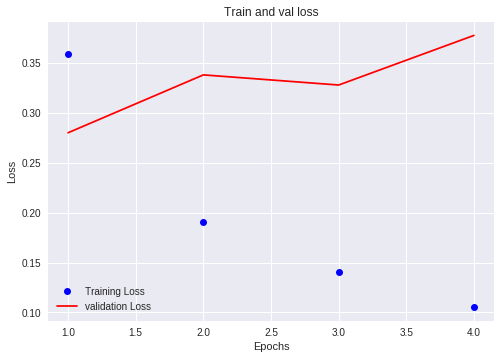

In [73]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, e+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='validation Loss')
plt.title('Train and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

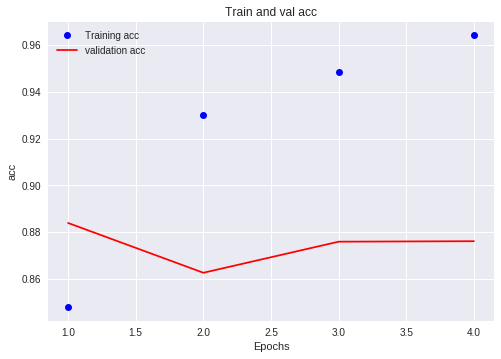

In [74]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, e+1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='validation acc')
plt.title('Train and val acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [75]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 98us/step


In [76]:
results

[0.41067891573905946, 0.8608]

In [93]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [98]:
model.predict(x_test)[-1]

array([0.94877124], dtype=float32)

In [0]:
word_in = imdb.get_word_index()
rev =  dict([(value, key) for (key, value) in word_in.items()])
decoded = ' '.join([rev.get(i-3,' ' ) for i in test_data[-1]])

In [90]:
decoded


"  a good ol' boy film is almost required to have   car chases a storyline that has a vague resemblance to plot and at least one very pretty country gal   with short shorts and a low top the pretty gal is here dressed in designer   but the redneck   stop there jimmy dean is a natural as a     but as a tough guy former sheriff he comes up way short big john is big but he isn't convincing with the bad part of his   bug eyed jack   is a hoot as always and bo hopkins has been playing this same part for decades ned beatty also does his part in a small role but there is no story it   more like an episode of in the heat of the night than a feature film   with easily predictable sentiment perhaps the most glaring problem with this movie is charlie daniels singing the theme you know the one it was made famous by jimmy dean"

In [84]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])